ANALYZE PSEI PRICE PERFORMANCE USING SENTIMENTAL AND NUMERICAL ANALYSIS, AND FORECAST PRICE USING MACHINE LEARNING (Part 1)

IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 

                                                                                    FEATURE ENGINEERING

In [2]:
#Import dataset
df_price = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PSEI(2014-2023).csv')
df_news = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PH-News-MT.csv')
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_news['Date'] = pd.to_datetime(df_news['Date']).dropna()
df_price = df_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df_news = df_news.set_index('Date').sort_values(by='Date')
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')

display(df_news)
display(df_price)

,Headlines
Date,
2014-01-01,Culture of sharing.
2014-01-01,More coop bank mergers up.
2014-01-01,China Bank looking at over 400 branches this y...
2014-01-01,Cebu wind project gets foreign interest.
2014-01-01,Asean forest network gets boost.
...,...
2023-05-14,3D billboard excellence puts PH in global map.
2023-05-14,Overcoming adversity with digitalization.
2023-05-14,Internet users cautioned against embedded malw...


,Close
Date,
2014-01-02,5984.259766
2014-01-03,5947.930176
2014-01-06,5985.810059
2014-01-07,5947.439941
2014-01-08,5986.479980
...,...
2023-05-08,6600.740234
2023-05-09,6622.609863
2023-05-10,6658.589844


In [3]:
# Merge news headlines based on date, from 65006 rows to 3221 rows
df_news = df_news.groupby('Date')['Headlines'].apply(' '.join).reset_index()
df_news = df_news.set_index('Date')
display(df_news)

,Headlines
Date,
2014-01-01,Culture of sharing. More coop bank mergers up....
2014-01-02,BSP ready to counter future risks. Peso drops ...
2014-01-03,Philippine statistical agencies to be merged a...
2014-01-05,First full week stock market trade for 2014 st...
2014-01-06,BSP seen retaining policy. Asian marts retreat...
...,...
2023-05-10,San Miguel's F&B unit posts positive quarter. ...
2023-05-11,DMCI Q1 net income plunges 32% to P7.6B. Peso ...
2023-05-12,"Education, behavior key to EPR law success. Pa..."


In [4]:
display(df_news)

,Headlines
Date,
2014-01-01,Culture of sharing. More coop bank mergers up....
2014-01-02,BSP ready to counter future risks. Peso drops ...
2014-01-03,Philippine statistical agencies to be merged a...
2014-01-05,First full week stock market trade for 2014 st...
2014-01-06,BSP seen retaining policy. Asian marts retreat...
...,...
2023-05-10,San Miguel's F&B unit posts positive quarter. ...
2023-05-11,DMCI Q1 net income plunges 32% to P7.6B. Peso ...
2023-05-12,"Education, behavior key to EPR law success. Pa..."


                                                                                    SENTIMENT ANALYSIS

EDA: SENTIMENT SCORES

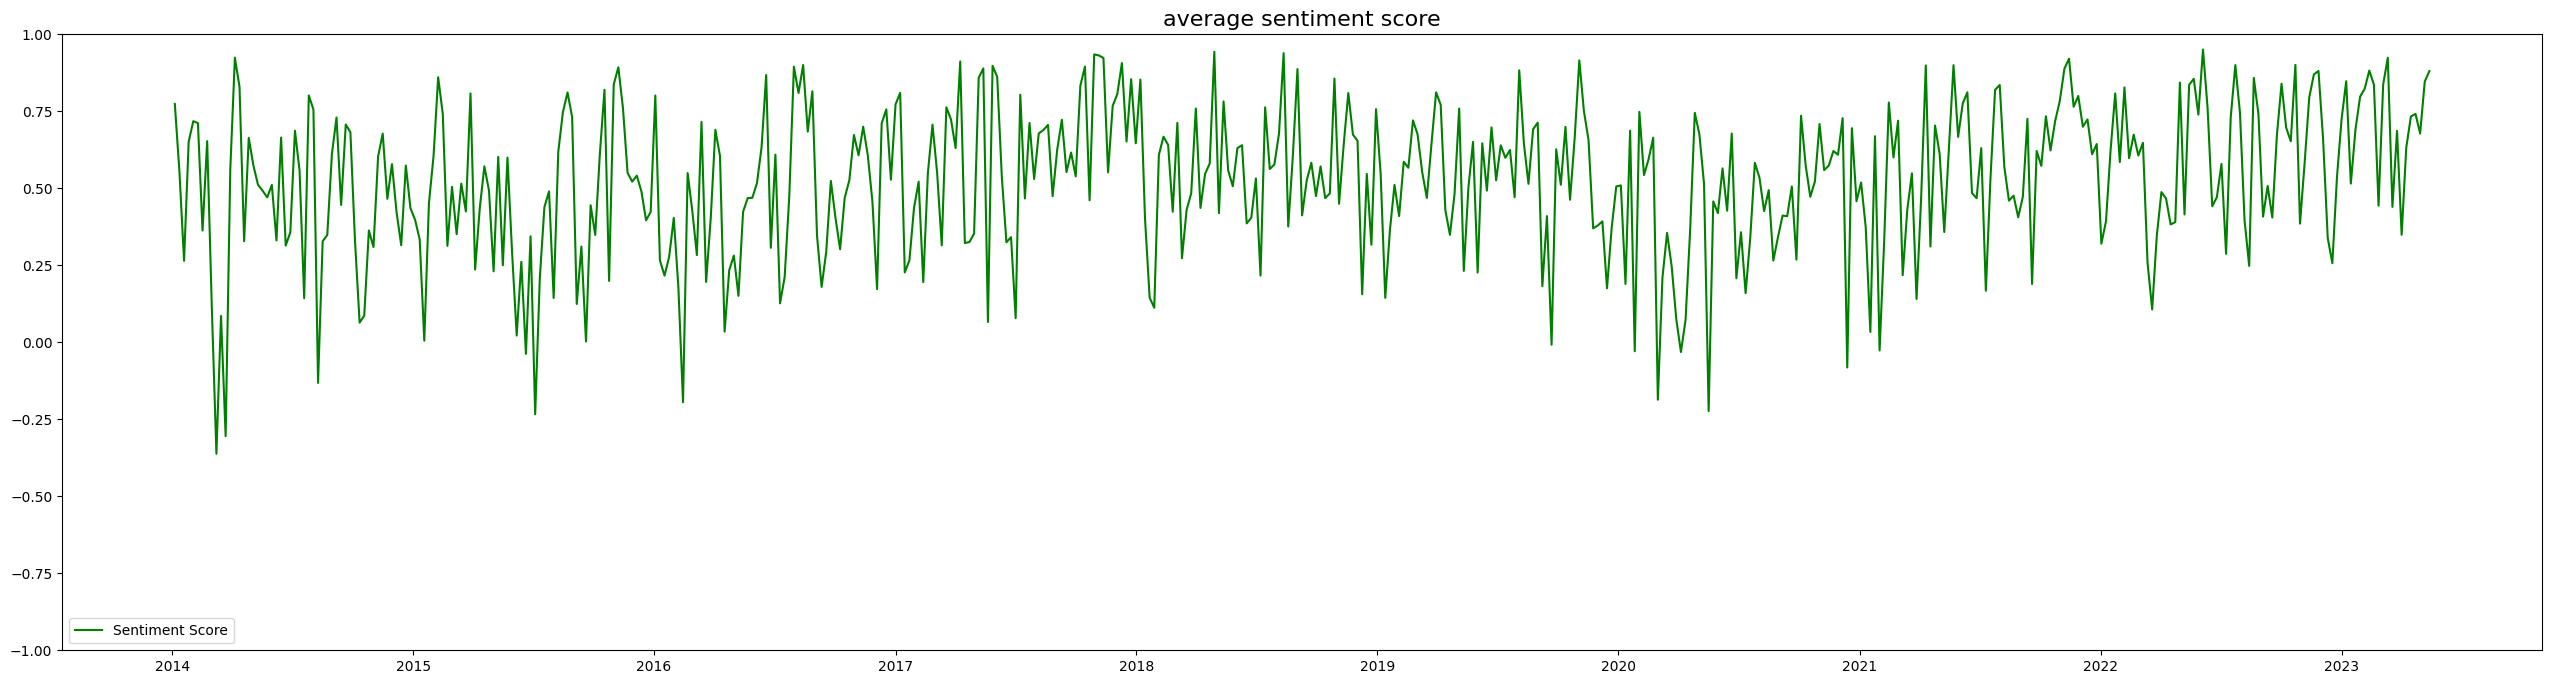

In [5]:
# Import Sentiment Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df_news = df_news.assign(Compound='') # adding empty sentiment columns to stock price data

# Extract sentiment score from news headlines
SIA = SentimentIntensityAnalyzer()
df_news['Compound'] = df_news['Headlines'].apply(lambda x: SIA.polarity_scores(x)['compound'])

df_sent = df_news.drop(['Headlines'], axis=1)
df_sent = df_sent.resample('W').mean() #get the weekly average sentiment score

plt.figure(figsize=(32,8))
plt.plot(df_sent.index, df_sent['Compound'], color='g')
plt.title('average sentiment score', fontsize=16)
plt.ylim(-1,1)
plt.legend(['Sentiment Score'], loc='lower left')
plt.show()

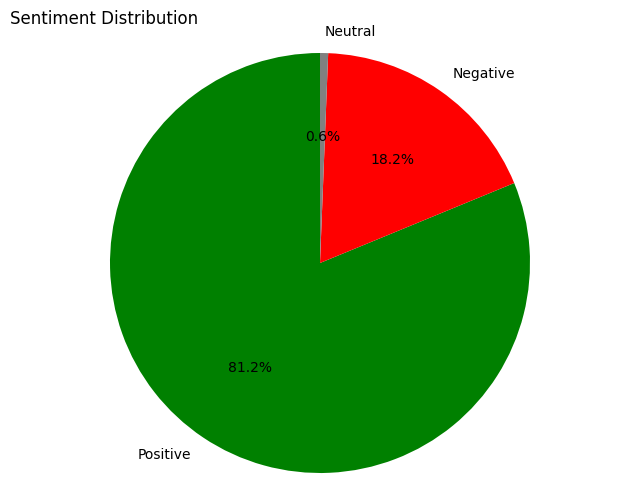

In [6]:
# Categorize sentiment scores for pie chart
pos = len(df_news[df_news['Compound'] > 0])
neg = len(df_news[df_news['Compound'] < 0])
neu = len(df_news[df_news['Compound'] == 0])

label = ['Positive', 'Negative', 'Neutral'] # Create labels for the pie chart
size = [pos, neg, neu] # Create sizes for the pie chart
color = ['g', 'r', 'gray'] # Create colors for the pie chart

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(size, labels=label, colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution', loc= 'left')
plt.axis('equal')
plt.show()

Exploratory Data Analysis (EDA): SENTIMENT SCORE VS. STOCK MARKET PRICE

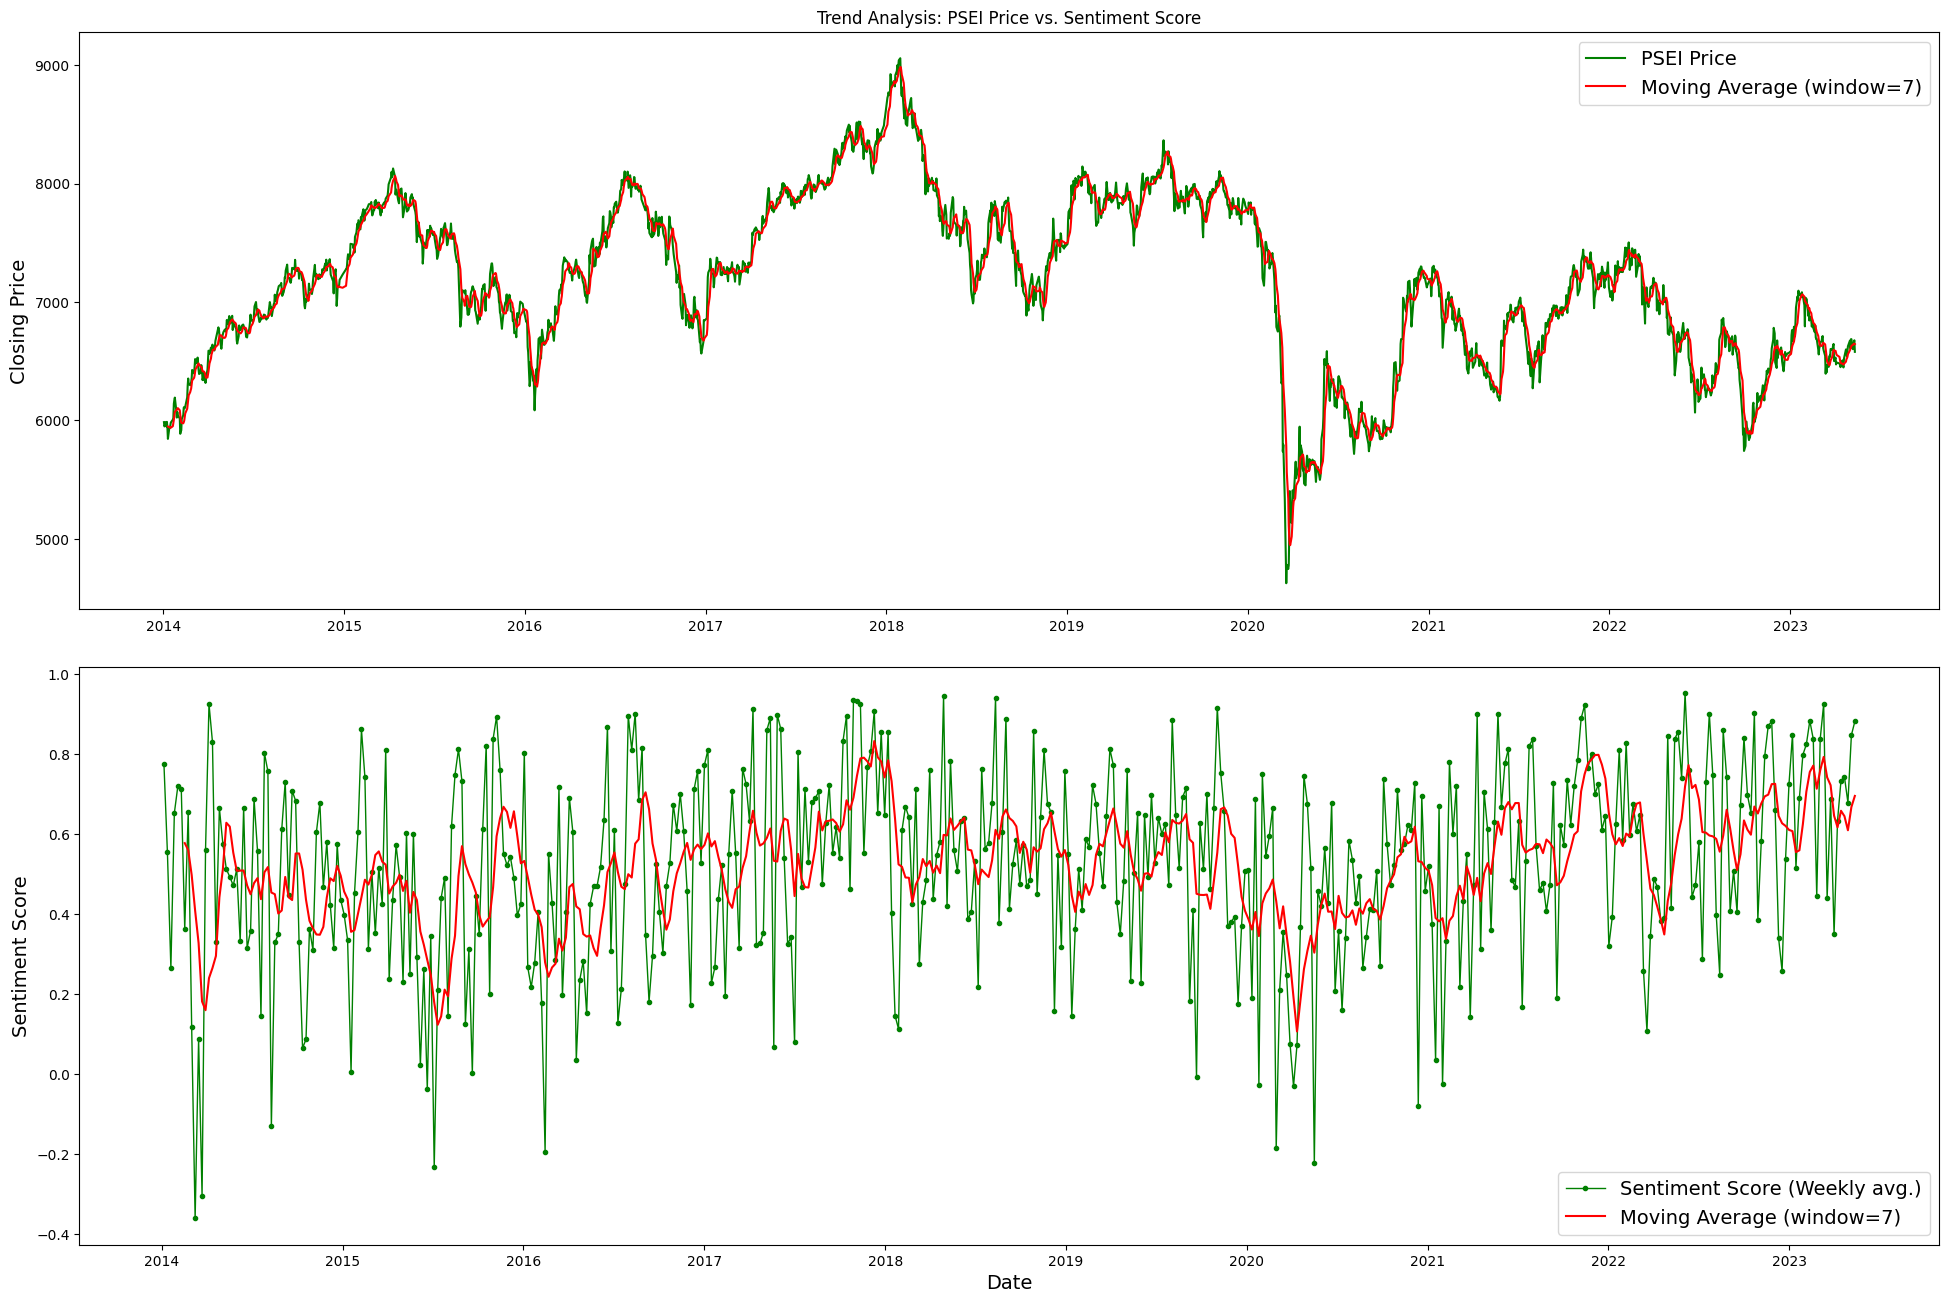

In [7]:
window_size = 7  # Define the window size for the moving average, 7 window size = 7 data points
# Get moving average of price and sentiment score
price_ma = df_price['Close'].rolling(window=window_size).mean()
sent_ma = df_sent['Compound'].rolling(window=window_size).mean()

plt.figure(figsize=(24, 24))
plt.subplot(3, 1, 1)
plt.plot(df_price.index, df_price['Close'], color='g', label='PSEI Price')
plt.plot(price_ma, label='Moving Average (window={})'.format(window_size), color= 'r')
# plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.title('Trend Analysis: PSEI Price vs. Sentiment Score')
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.1)

plt.subplot(3, 1, 2)
plt.plot(df_sent.index,df_sent['Compound'], color='green', marker='.', linestyle='-', linewidth=1, label='Sentiment Score (Weekly avg.)')
plt.plot(sent_ma, label='Moving Average (window={})'.format(window_size), color= 'r')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Sentiment Score',fontsize=14)
plt.legend(fontsize=14)
plt.show()

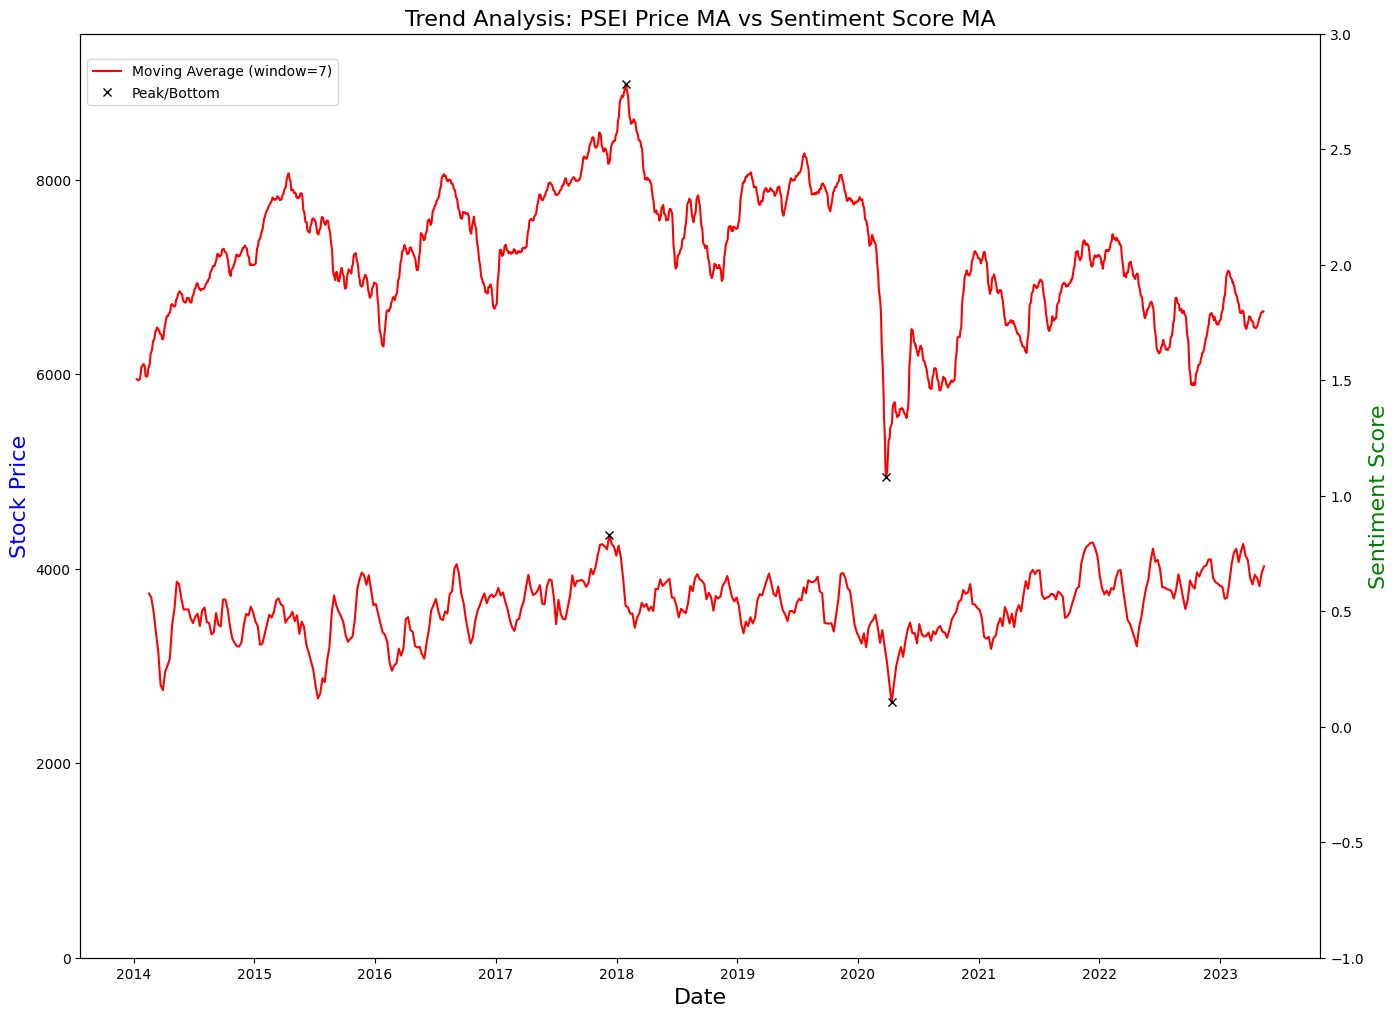

In [8]:
#Capture peak and bottom data points of the MAs
price_min , ind_price_min = price_ma.min() , price_ma.idxmin()
price_max , ind_price_max = price_ma.max() , price_ma.idxmax()
sent_min , ind_sent_min = sent_ma.min() , sent_ma.idxmin()
sent_max , ind_sent_max = sent_ma.max() , sent_ma.idxmax()

#Plot chart with 2 y-axes
fig, ax1 = plt.subplots(figsize=(16,12))
ax1.plot(price_ma, label='Moving Average (window={})'.format(window_size), color= 'r')
ax1.plot(ind_price_min , price_min , 'kx' , label='Peak/Bottom')
ax1.plot(ind_price_max , price_max , 'kx')
ax1.set_xlabel('Date',fontsize=16)
ax1.set_ylabel('Stock Price', color='blue',fontsize=16)
ax1.set_ylim(0, 9500)
ax1.plot()

ax2 = ax1.twinx()
ax2.plot(sent_ma, label='Moving Average (window={})'.format(window_size), color= 'r')
ax2.plot(ind_sent_min , sent_min , 'kx' )
ax2.plot(ind_sent_max , sent_max , 'kx')
ax2.set_ylabel('Sentiment Score', color = 'green', fontsize=16)
ax2.set_ylim(-1,3)

ax1.legend(fontsize = 10, loc='upper left', bbox_to_anchor=(0, 0.98))
plt.title('Trend Analysis: PSEI Price MA vs Sentiment Score MA', fontsize=16)
plt.show()

In trend analysis
The use of moving average filters out the noise in the data, leaving a clearer view of the underlying trend. In the chart above, the moving averages was extracted and compared.
Through observation, we can see coinciding (from left to right) trend of higher lows and higher highs, data point peak, data point bottom, trend of higher lows and higher highs.
Based on the result of trend analysis, a hypothesis about PSEI price and sentiment scores can be drawn, hence, a statistical analysis comes next.

                                                                    CORRELATION AND REGRESSION ANALYSIS

Null Hypothesis (H0): There is no significant correlation between stock price and sentiment score.

Alternative Hypothesis (Ha): There is a significant correlation between stock price and sentiment score.

Calculation of correlation coefficient and a regression analysis will be performed to determine if the observed relationship between PSEI price and sentiment score is statistically significant. Based on the results, either reject the null hypothesis in favor of the alternative hypothesis if the relationship is significant or fail to reject the null hypothesis if the relationship is not significant.

Correlation coefficient: 0.10039304045209703
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.958
Date:                Sun, 28 May 2023   Prob (F-statistic):             0.0264
Time:                        05:22:22   Log-Likelihood:                -3889.0
No. Observations:                 489   AIC:                             7782.
Df Residuals:                     487   BIC:                             7790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

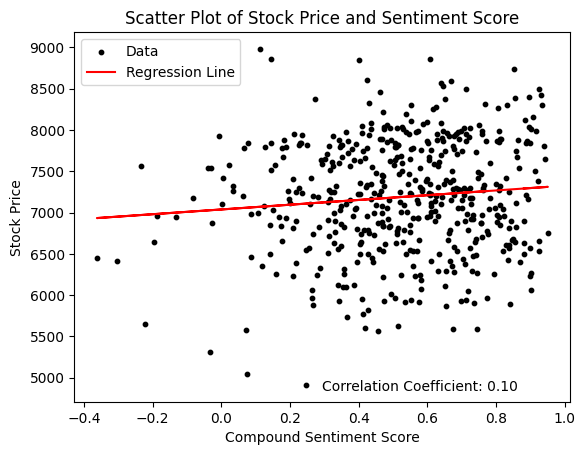

In [9]:
#                                                                    CORRELATION AND REGRESSION ANALYSIS
import statsmodels.api as sm 
#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, 
# as well as for conducting statistical tests, and statistical data exploration.
df_merged = pd.merge(df_price, df_news, on='Date', how='outer').drop(['Headlines'], axis=1).sort_values(by='Date')
#I performed an outer merge so that there won't be any discarded data, and to fill the gaps or NaN values in the dataframe, I took their weekly average instead of doing interpolation.
df_corr = df_merged.resample('W').mean().dropna() 


# Calculate correlation coefficient
correlation = df_corr['Compound'].corr(df_corr['Close'])
print(f"Correlation coefficient: {correlation}") # Display the correlation coefficient

# Define the independent variable (X) and dependent variable (y)
X_reg = df_corr['Compound'] #sentiment score = independent variable
X_reg = sm.add_constant(X_reg)  # Add a constant term to the independent variable 
                                # This ensures that the linear regression model estimates both the intercept and the slope of the regression line.
y_reg = df_corr['Close'] #PSEI price = dependent variable

# Fit the linear regression model
reg_model = sm.OLS(y_reg, X_reg)
reg_result = reg_model.fit()
print(reg_result.summary()) # Print the regression summary

# Retrieve the coefficients
intercept = reg_result.params[0]
slope = reg_result.params[1]

# Plot the scatter plot with the regression line
plt.scatter(df_corr['Compound'], df_corr['Close'], label='Data', s=10, color='k')
plt.plot(df_corr['Compound'], intercept + slope * df_corr['Compound'], color='r', label='Regression Line') # Plots the regression line
plt.text(0.5, 0.03, f'Correlation Coefficient: {correlation:.2f}', transform=plt.gca().transAxes, color= 'k') # Add correlation coefficient as text in the plot
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Stock Price')
plt.title('Scatter Plot of Stock Price and Sentiment Score')
plt.legend(loc='upper left')
plt.show()

In [10]:
summary = reg_result.summary()
display(summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.958
Date:                Sun, 28 May 2023   Prob (F-statistic):             0.0264
Time:                        05:22:22   Log-Likelihood:                -3889.0
No. Observations:                 489   AIC:                             7782.
Df Residuals:                     487   BIC:                             7790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7037.5976     74.572     94.373      0.000    6891.075    7184.120
Compound     288.1178    129.390      2.227      0.026      33.885     542.350
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.385
Skew:                          -0.227   Prob(JB):                       0.0677
Kurtosis:                       2.758   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

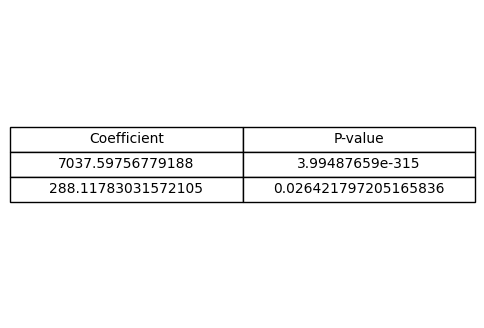

In [11]:
# Create a DataFrame for the results
summary_table = pd.DataFrame({'Coefficient': reg_result.params, 'P-value': reg_result.pvalues})

# Plot the results as a table using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide axis

table = ax.table(cellText=summary_table.values,
                 colLabels=summary_table.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.show()

Correlation and regression analyses are employed to examine the association between stock price and sentiment score. The correlation coefficient measures the strength and direction of the linear relationship, while the p-value determines the statistical significance of the observed correlation.

The analysis reveals a correlation coefficient of 0.10 between stock price and sentiment score. This positive correlation suggests that an increase in sentiment score is associated with a slight upward movement in stock price. However, the correlation coefficient indicates a weak relationship between the two variables.
Furthermore, the p-value associated with the correlation coefficient is found to be 0.026, which is below the commonly used significance level of 0.05. This implies that the observed correlation is statistically significant, indicating that the relationship between stock price and sentiment score is unlikely to have occurred by chance.

In conclusion, the results reveal a statistically significant, albeit weak, positive correlation between the two variables. These findings suggest that market sentiment, as reflected in the sentiment score, may play a role in stock price movements. In theory the correlation of a stock price and the people's sentiment should be strong but result shows otherwise, this may be explained by the data used for sentiment analysis is relatively unreliable which may be caused by news headlines being short, hence, a topic for another research.

How about volume?
No data on sell volume and buy volume, so not feasible now, but a great topic for another exploratory data analysis.

It feels satisfying to see the results of the correlation, although weak, it still gives reliability on the original dataset I scraped from the web.